# 📉 Projeto Data Science: Evasão de Clientes - TelecomX

In [31]:
# 📦 Importação de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set(style="whitegrid")

In [32]:
# 📥 Carregamento de Dados
from google.colab import files
uploaded = files.upload()

with open("TelecomX_Data.json", "r") as f:
    data = json.load(f)

df = pd.json_normalize(data, sep='_')
print("✅ Dados carregados com sucesso!")
df.head()

Saving TelecomX_Data.json to TelecomX_Data.json
✅ Dados carregados com sucesso!


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [33]:
# 🧼 Limpeza de Dados
df.replace('', pd.NA, inplace=True)
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df = df[df['Churn'].isin(['Yes', 'No'])]
print("\nℹ️ Informações do DataFrame:")
print(df.info())


ℹ️ Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport   

In [34]:
# 🧪 Engenharia de Variáveis
df['Churn_flag'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['SeniorCitizen'] = df['customer_SeniorCitizen'].map({1: 'Senior', 0: 'Adult'})
df['tenure_years'] = df['customer_tenure'] / 12

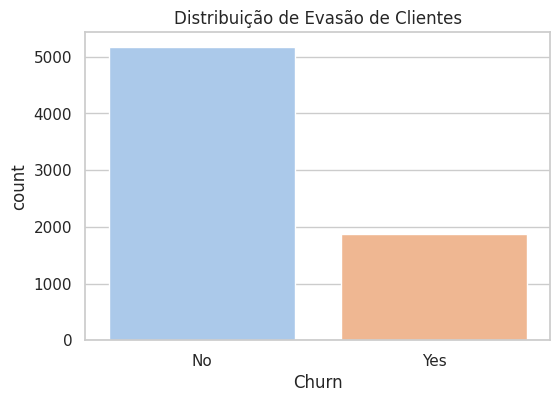

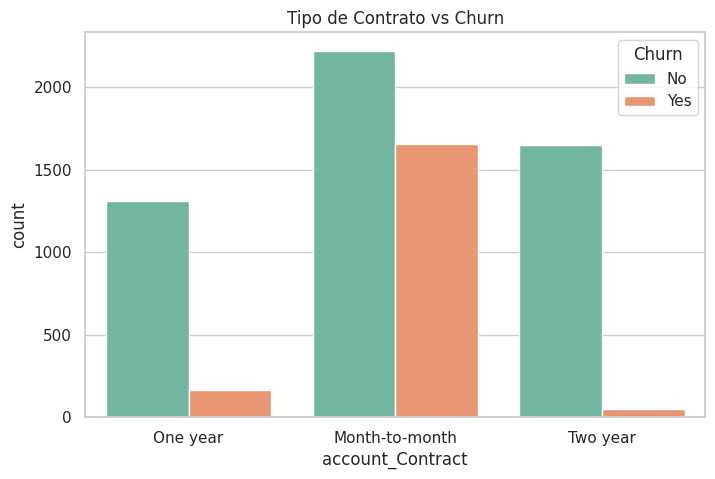

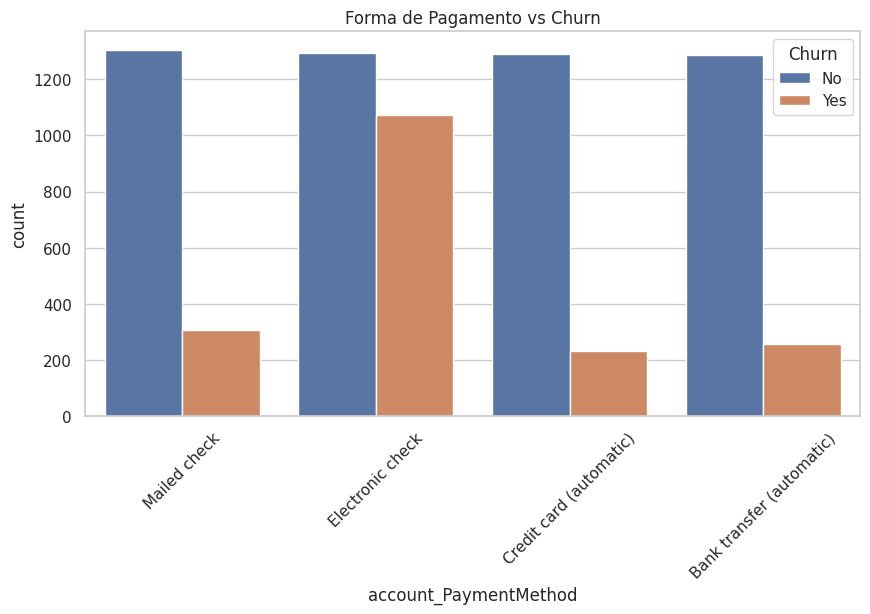

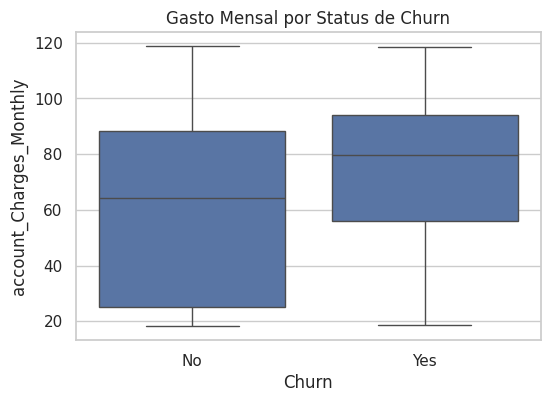

In [35]:
# 📊 EDA - Análise Exploratória de Dados
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, hue='Churn', palette='pastel', legend=False)
plt.title('Distribuição de Evasão de Clientes')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='account_Contract', hue='Churn', data=df, palette='Set2')
plt.title('Tipo de Contrato vs Churn')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='account_PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Forma de Pagamento vs Churn')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df)
plt.title('Gasto Mensal por Status de Churn')
plt.show()

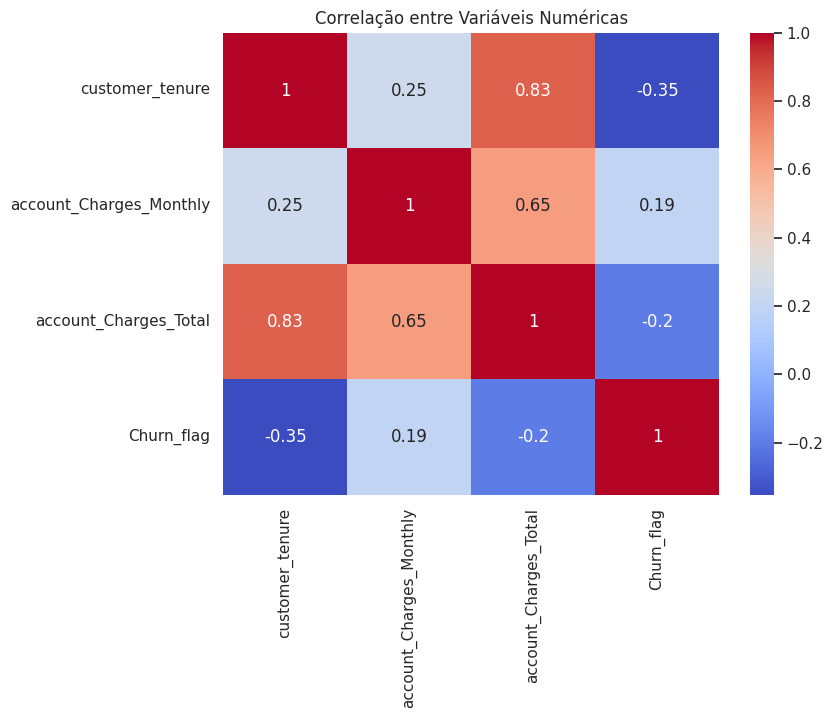

In [36]:
# 🔥 Correlação
plt.figure(figsize=(8,6))
sns.heatmap(df[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'Churn_flag']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

In [37]:
# ✅ Conclusões
from IPython.display import Markdown as md

md("""
## 🧾 Conclusões

- Contratos **mensais** têm maior propensão ao cancelamento.
- Clientes **recentes (menos de 1 ano)** representam boa parte das evasões.
- Forma de pagamento **Cheque eletrônico** está relacionada à evasão.
- Falta de serviços adicionais como **Segurança Online** e **Suporte Técnico** é frequente entre clientes que saem.

---

## 📌 Recomendações

- Estimular planos **anuais ou bianuais**.
- Programas de **retenção para novos clientes**.
- Incentivar outros métodos de pagamento.
- Oferecer **pacotes combinados** com serviços adicionais.
""")


## 🧾 Conclusões

- Contratos **mensais** têm maior propensão ao cancelamento.
- Clientes **recentes (menos de 1 ano)** representam boa parte das evasões.
- Forma de pagamento **Cheque eletrônico** está relacionada à evasão.
- Falta de serviços adicionais como **Segurança Online** e **Suporte Técnico** é frequente entre clientes que saem.

---

## 📌 Recomendações

- Estimular planos **anuais ou bianuais**.
- Programas de **retenção para novos clientes**.
- Incentivar outros métodos de pagamento.
- Oferecer **pacotes combinados** com serviços adicionais.
